# Histograms

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

        plt.hist(data = df, x = 'num_var')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df=pd.read_csv('../Code/pokemon.csv')
df.rename(columns={'#':'id'},inplace=True)
df.head()

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Let's start this example by looking at Pokemon speed. The higher the value, the sooner they will act in battle. 

(array([ 30.,  97., 183., 168., 144., 108.,  50.,  11.,   8.,   1.]),
 array([  5. ,  22.5,  40. ,  57.5,  75. ,  92.5, 110. , 127.5, 145. ,
        162.5, 180. ]),
 <a list of 10 Patch objects>)

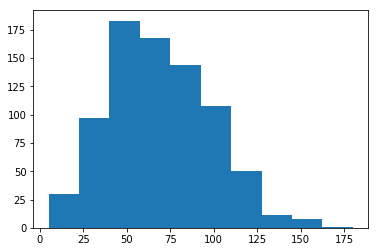

In [6]:
plt.hist(data=df,x='Speed')

You can see that there are 30 data points that fall in the range between about 0 and 25 in the leftmost bin, and 97 points in the range from about 25 to 50 in the adjacent bin. Overall, a generally a uni model distribution is observed (one  peak or hump). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasize the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the hist function divides the data into **10 bins**, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret. 

You can use descriptive statistics (e.g.**via df['Speed'].describe()**) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using **numpy's arange** function:

(array([ 0.,  2.,  3.,  9., 21., 17., 44., 31., 49., 41., 54., 49., 54.,
        52., 52., 26., 44., 35., 41., 39., 44., 23., 22., 14.,  9.,  6.,
         6.,  2.,  2.,  3.,  4.,  0.,  1.,  0.,  0.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180], dtype=int64),
 <a list of 36 Patch objects>)

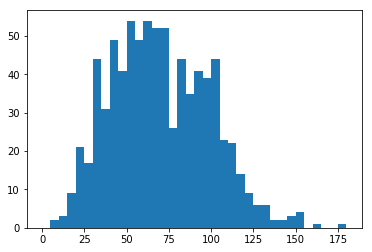

In [9]:
bin_edges=np.arange(0,df['Speed'].max()+5,5)
plt.hist(data=df,x='Speed',bins=bin_edges)

The first argument to arange is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+5" (the bin width). That is because arange will only return values that are strictly less than the upper limit. Adding in "+5" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

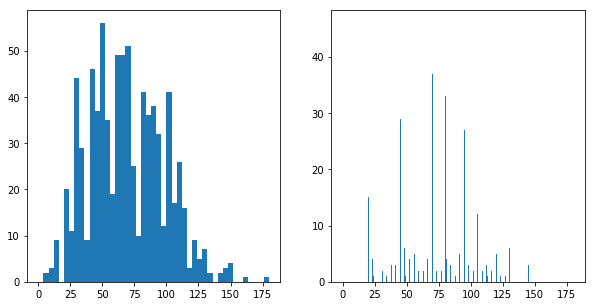

In [13]:
plt.figure(figsize=[10, 5])
# histogram on left, example of too-large bin size
plt.subplot(1,2,1)
edge_ranges=np.arange(0,df.Speed.max()+4, 4);
plt.hist(data=df,x='Speed',bins=edge_ranges);


# histogram on right, example of too-small bin size
plt.subplot(1,2,2)# 1 row, 2 cols, subplot 2
edge_ranges=np.arange(0,df.Speed.max()+1/4, 1/4);
plt.hist(data=df,x='Speed',bins=edge_ranges);

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The figure() function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the section.)

# Alternative Approach

The seaborn function distplot can also be used to plot a histogram, and is integrated with other univariate plotting functions.

        sb.distplot(df['num_var'])


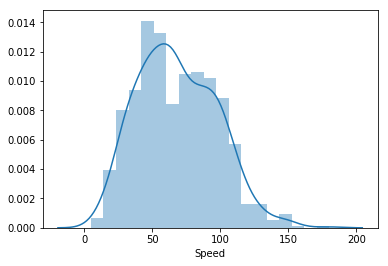

In [14]:
sb.distplot(df.Speed)

When we specify the data to be plotted, note that the first argument must be the Series or array with the points to be plotted. This is in contrast to our ability to specify a data source and column as separate arguments, like we've seen with and countplot and hist.

The distplot function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1.

Despite the fact that the default bin-selection formula used by **distplot** might be better than the choice of ten bins that **.hist** uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

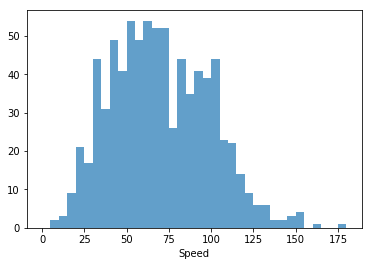

In [20]:
edge_range=np.arange(0,df.Speed.max()+5,5)
sb.distplot(df.Speed,bins=edge_range,kde=False,hist_kws={'alpha':.7})

The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.

In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional functionality offered by **distplot**, then you might be better off with just using **Matplotlib's hist** function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic distplot first before getting into the customization.